In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import src.names_numbers as NN
from src.names_numbers import heroes as H 

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from src.roc import plot_roc
from sklearn.metrics import confusion_matrix, mean_squared_error
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/dota2Train.csv', header=None)
#df.head()

In [4]:
df.rename(columns={0: 'winner',
                   1: 'region',
                   2: 'mode',
                   3: 'type'}, inplace=True)
#df.head()

In [5]:
df.columns = [(i-3) if type(i) == int else i for i in df.columns]

In [6]:
#NN.get_names(df)

In [7]:
#df.head()

In [8]:
#NN.get_nums(df)

In [9]:
#df.head()

In [6]:
#start random forest work need binary
# winner column 0 = team B wins,  1 = team A
rfdf = df.copy()
for i in ['region', 'mode', 'type']:
    rfdf.pop(i)
winner = rfdf.pop('winner')
y = winner.replace(-1, 0)
#make X values binary, each column is char-team, 1 denotes picked.
X = rfdf
X2 = X.copy()
X.columns = [(str(i) + 'A') for i in X.columns]
X2.columns = [(str(i) + 'B') for i in X2.columns]
X.replace(-1, 0, inplace=True)
X2.replace(1, 0, inplace=True)
X2.replace(-1, 1, inplace=True)
X = pd.concat([X, X2], axis=1)
X.shape

(92650, 226)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("\nscore:", rf.score(X_test, y_test))
y_predict = rf.predict(X_test)
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nprecision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


score: 0.5760911798989768

confusion matrix:
[[5403 5580]
 [4239 7941]]

precision: 0.5873086310184158
    recall: 0.6519704433497537


In [37]:
trf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
trf.fit(X_train, y_train)
print("\nscore:", trf.score(X_test, y_test))
y_predict = trf.predict(X_test)
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_predict))
print("\nprecision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


score: 0.5903812114147563

confusion matrix:
[[5076 5907]
 [3581 8599]]

precision: 0.5927891906797187
    recall: 0.7059934318555008


In [32]:
present = pd.DataFrame([np.zeros(len(X.columns))], columns=X.columns)
teamA = ['enchantress','oracle','leshrac','bane','beastmaster']
teamB = ['mirana','phantom_assassin','pudge','legion_commander','juggernaut']
for hero in teamA:
    col = str(NN.get_id(hero)) + 'A'
    present[col] = 1.0
for hero in teamB:
    col = str(NN.get_id(hero)) + 'B'
    present[col] = 1.0
rf.predict(present)

,1A,2A,3A,4A,5A,6A,7A,8A,9A,10A,...,104B,105B,106B,107B,108B,109B,110B,111B,112B,113B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#names

In [35]:

present

,1A,2A,3A,4A,5A,6A,7A,8A,9A,10A,...,104B,105B,106B,107B,108B,109B,110B,111B,112B,113B
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
rf.predict(present)

array([0])

In [12]:
# random_forest_grid = {'criterion':['entropy'],
#                       'max_depth': [None, 3, 10],
#                       'max_features': ['sqrt', 'log2', None],
#                       'min_samples_split': [2,4],
#                       'min_samples_leaf': [1,2,4,10],
#                       'bootstrap': [True, False],
#                       'n_estimators': [10, 20, 40, 80, 150, 200, 300],
#                       'random_state': [1]}

# rf_gridsearch = cv.GridSearchCV(RandomForestClassifier(),
#                              random_forest_grid,
#                              n_jobs=-1,
#                              verbose=True,
#                              scoring='neg_log_loss',
#                              cv=5)
# rf_gridsearch.fit(X_train, y_train)
# print("best parameters:        ", rf_gridsearch.best_params_)

# rf_best_estimator = rf_gridsearch.best_estimator_
# print('best estimator:         ', rf_best_estimator)

### XGB work

In [13]:
#XGB testing
#import xgboost as xgb

In [14]:
# y = digits['target']
# X = digits['data']
# kf = KFold(n_splits=2, shuffle=True, random_state=rng)
# for train_index, test_index in kf.split(X):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))

In [15]:
#X.reset_index(inplace=True)
# kf = KFold(n_splits=2, shuffle=True)
# for train_index, test_index in kf.split(X[:20]):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))
#     break

## grphing

In [12]:
hero_pick_dict = {}
for column in X.columns:
    picks = X[column].sum()
    name = NN.get_name(column)[0]
    if name not in hero_pick_dict:
        hero_pick_dict[name] = 0
    hero_pick_dict[name] += picks

lst_of_picks = list(hero_pick_dict.items())
lst_of_picks.sort(key=lambda x: x[1], reverse=True)

In [13]:
print(lst_of_picks[-1:-10:-1])

[('abyssal_underlord', 0), ('wraith_king', 0), ('chen', 790), ('visage', 888), ('brewmaster', 1558), ('lone_druid', 1575), ('wisp', 1592), ('arc_warden', 1791), ('broodmother', 1960)]


In [14]:
print(lst_of_picks[:10])

[('mirana', 32048), ('phantom_assassin', 29802), ('pudge', 28285), ('legion_commander', 26521), ('juggernaut', 23327), ('slark', 23125), ('drow_ranger', 21700), ('invoker', 21262), ('axe', 20264), ('riki', 19670)]


In [15]:
names = [i[0] for i in lst_of_picks]
picks = [i[1] for i in lst_of_picks]

In [16]:
hero_id_dict = {hero['id']: (hero['name'], hero['localized_name'])for hero in H}
hero_name_dict = {hero['name']: hero['id'] for hero in H}
local_names = [i[1] for i in hero_id_dict.values()]

<BarContainer object of 113 artists>

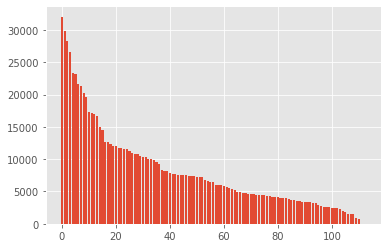

In [17]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), picks)

In [18]:
wdf = X.copy()

In [19]:
wdf['winner'] = y

In [20]:
top_10 = names[:10]
def hero_wins(name):
    hero_id = hero_name_dict[name]
    col_1 = str(hero_id)+'A'
    team_a_win_df = wdf[(wdf[col_1] == 1) & (wdf['winner'] == 1)]
    col_2 = str(hero_id)+'B'
    team_b_win_df = wdf[(wdf[col_2] == 1) & (wdf['winner'] == 0)]
    comb = team_a_win_df.count(axis=0)[col_1] + team_b_win_df.count(axis=0)[col_2]
    return comb


In [21]:
wins = [hero_wins(i) for i in names]

<BarContainer object of 113 artists>

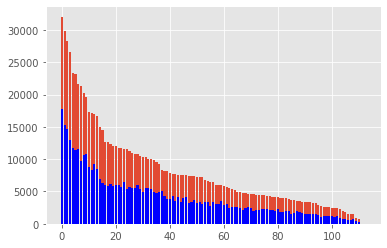

In [22]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), picks)
ax.bar(np.arange(len(names)), wins, color='blue')

In [23]:
ratio = np.array(wins) / np.array(picks)

<BarContainer object of 113 artists>

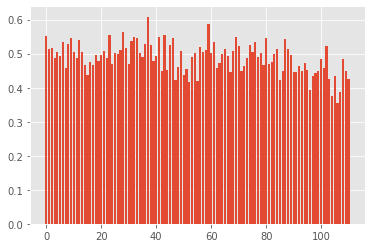

In [24]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(names)), ratio)

In [25]:
lst_of_picks_by_id = [(NN.get_id(i[0]),i[1]) for i in lst_of_picks]

In [26]:
lst_of_picks_by_id.sort(key=lambda x: x[0], reverse=True)

<BarContainer object of 113 artists>

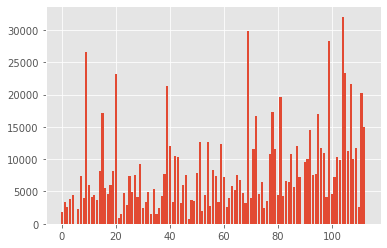

In [27]:
chrono_picks = [i[1] for i in lst_of_picks_by_id]
fig, ax = plt.subplots()
ax.bar(np.arange(len(chrono_picks)), chrono_picks)